**Standardization**

In [5]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline
plt.style.use('ggplot')

In [6]:
# Creating DataFrame norm_df from CSV NormDF
norm_df = pd.read_csv('OutlierFix1', index_col=0)

# Displaying first five results 
norm_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,1.000000,2.117912,0.929419,1.510341,2.086360,1.0,1.508104,...,2.838849,3.957892,2.068186,2.143015,0,1,1,0.587076,9.0,1.306758
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,0.903090,2.154435,0.903090,1.391200,2.413300,0.0,-1.174460,...,3.049218,4.140818,2.383815,2.374748,1,0,0,1.080223,9.0,0.000000
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,0.845098,2.410142,1.079181,1.373027,1.954243,1.0,-1.074337,...,2.511883,3.936497,1.518514,1.778151,1,0,0,0.527518,13.0,0.000000
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,1.060698,2.519842,1.146128,1.521173,2.320146,1.0,-0.969052,...,2.706718,4.308869,1.770852,2.041393,1,1,0,0.518474,15.0,0.000000
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.322219,2.758924,1.278754,1.959459,1.903090,1.0,0.412129,...,2.857332,4.061548,2.173186,2.222716,0,1,1,0.571274,20.0,1.195813


In [7]:
# checking for null values 
print(norm_df.isnull().sum(axis=0).tolist())
# T5 has NULL value, fixing NULL 

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [8]:
norm_df['T5'].fillna(norm_df['T5'].median(), inplace=True)

In [9]:
# checking for null values 
print(norm_df.isnull().sum(axis=0).tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [10]:
# Taking catagorical variables and putting them in df_I
# This way, they do not interfere with Standardization
df_I = norm_df.iloc[:,:3]

# Checking df_I 
df_I.head()

,I1,I2,I3
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834
2,ACAD,ACADIA PHARMACEUTICALS INC,2834
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492


In [11]:
# Temporarily dropping catagorical variables from 
# norm_df DataFrame 
norm_df=norm_df.drop(['I1', 'I2', 'I3'], axis=1)
norm_df.head()

,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,C4,C5,C6,...,T5,S1,S2,S3,Y1,Y2,C3',C5',P(mid),C6'
0,1.000000,2.117912,0.929419,1.510341,2.086360,1.0,1.508104,0.029074,1.967162,1.915234,...,2.838849,3.957892,2.068186,2.143015,0,1,1,0.587076,9.0,1.306758
1,0.903090,2.154435,0.903090,1.391200,2.413300,0.0,-1.174460,-0.013352,1.953986,1.854720,...,3.049218,4.140818,2.383815,2.374748,1,0,0,1.080223,9.0,0.000000
2,0.845098,2.410142,1.079181,1.373027,1.954243,1.0,-1.074337,0.020715,1.933344,1.885107,...,2.511883,3.936497,1.518514,1.778151,1,0,0,0.527518,13.0,0.000000
3,1.060698,2.519842,1.146128,1.521173,2.320146,1.0,-0.969052,0.020023,1.928444,1.880805,...,2.706718,4.308869,1.770852,2.041393,1,1,0,0.518474,15.0,0.000000
4,1.322219,2.758924,1.278754,1.959459,1.903090,1.0,0.412129,-0.034895,1.956366,1.905290,...,2.857332,4.061548,2.173186,2.222716,0,1,1,0.571274,20.0,1.195813


In [12]:
# Taking target variables and putting them in df_T
# This way, they do not interfere with Normalization
df_T = norm_df.iloc[:,11:13]
df_T.head()

,T1,T2
0,7.774980,112.778544
1,9.248234,147.621137
2,5.857766,72.539644
3,6.896434,90.879040
4,8.301031,121.778487


In [13]:
# Temporarily dropping catagorical variables from 
# norm_df DataFrame 
norm_df=norm_df.drop(['Y1','Y2'], axis=1)
norm_df.head()

,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,C4,C5,C6,...,T3,T4,T5,S1,S2,S3,C3',C5',P(mid),C6'
0,1.000000,2.117912,0.929419,1.510341,2.086360,1.0,1.508104,0.029074,1.967162,1.915234,...,107.517440,17.349352,2.838849,3.957892,2.068186,2.143015,1,0.587076,9.0,1.306758
1,0.903090,2.154435,0.903090,1.391200,2.413300,0.0,-1.174460,-0.013352,1.953986,1.854720,...,139.946418,22.583180,3.049218,4.140818,2.383815,2.374748,0,1.080223,9.0,0.000000
2,0.845098,2.410142,1.079181,1.373027,1.954243,1.0,-1.074337,0.020715,1.933344,1.885107,...,69.173694,11.313708,2.511883,3.936497,1.518514,1.778151,0,0.527518,13.0,0.000000
3,1.060698,2.519842,1.146128,1.521173,2.320146,1.0,-0.969052,0.020023,1.928444,1.880805,...,87.028731,13.304135,2.706718,4.308869,1.770852,2.041393,0,0.518474,15.0,0.000000
4,1.322219,2.758924,1.278754,1.959459,1.903090,1.0,0.412129,-0.034895,1.956366,1.905290,...,114.786759,18.330303,2.857332,4.061548,2.173186,2.222716,1,0.571274,20.0,1.195813


In [14]:
drop_df = pd.concat([df_I, df_T], axis=1, join_axes=[norm_df.index])
drop_df.head()

,I1,I2,I3,T1,T2
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,7.774980,112.778544
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,9.248234,147.621137
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,5.857766,72.539644
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,6.896434,90.879040
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,8.301031,121.778487


In [15]:
# Column Names 
norm_names = norm_df.columns

# Scaler function from Preprocessing 
scaler = preprocessing.StandardScaler()

# Transforming norm_df
stand_df = scaler.fit_transform(norm_df)

# Making DataFrame from Standardized data 
# Using column names defined earlier 
stand_df = pd.DataFrame(stand_df, columns=norm_names)

In [16]:
# Printing new DataFrame to check the outcome 
print(stand_df)

        P_IPO       P_H       P_L    P_1DAY        C1        C2        C3  \
0   -0.657417 -1.536646 -1.353286 -0.448017  0.061864  0.397360  1.341329   
1   -1.248445 -1.369829 -1.557354 -1.192796  1.363203 -2.516611 -0.868273   
2   -1.602123 -0.201891 -0.192519 -1.306401 -0.464011  0.397360 -0.785803   
3   -0.287236  0.299161  0.326368 -0.380307  0.992418  0.397360 -0.699081   
4    1.307714  1.391162  1.354312  2.359522 -0.667616  0.397360  0.438584   
5    0.137455 -0.072370 -0.055108 -0.161732 -0.388840  0.397360  0.421582   
6   -2.010414 -0.470493 -0.485407 -1.302136  0.144855  0.397360 -0.915676   
7   -2.493319 -0.201891 -0.192519 -1.842509 -0.444910 -2.516611 -0.645913   
8    0.416518  0.760016  0.775848  0.023338 -0.281880  0.397360 -0.558975   
9   -0.936479  0.977703  0.979916 -0.089445 -0.181153  0.397360  1.039908   
10   0.137455  0.054207  0.076913 -0.089445 -0.164921  0.397360  0.276577   
11  -2.493319 -1.709425 -1.557354 -1.462813 -0.299253  0.397360  0.276577   

In [17]:
# Adding the three catagorical values back into the DataFrame 
stand_df = pd.concat([df_I, stand_df], axis=1, join_axes=[stand_df.index])
stand_df.head()

,I1,I2,I3,P_IPO,P_H,P_L,P_1DAY,C1,C2,C3,...,T3,T4,T5,S1,S2,S3,C3',C5',P(mid),C6'
0,AATI,ADVANCED ANALOGIC TECHNOLOGIES INC,3674,-0.657417,-1.536646,-1.353286,-0.448017,0.061864,0.397360,1.341329,...,0.167675,0.189744,0.312555,0.016990,0.295829,0.130419,0.942972,0.073941,-0.888512,1.286365
1,ABPI,ACCENTIA BIOPHARMACEUTICALS INC,2834,-1.248445,-1.369829,-1.557354,-1.192796,1.363203,-2.516611,-0.868273,...,1.823140,1.855214,1.541652,0.305474,1.677794,1.496631,-1.060477,2.663906,-0.888512,-0.769239
2,ACAD,ACADIA PHARMACEUTICALS INC,2834,-1.602123,-0.201891,-0.192519,-1.306401,-0.464011,0.397360,-0.785803,...,-1.789733,-1.730874,-1.597768,-0.016751,-2.110875,-2.020675,-1.060477,-0.238850,-0.241240,-0.769239
3,ACHN,ACHILLION PHARMACEUTICALS INC,2834,-0.287236,0.299161,0.326368,-0.380307,0.992418,0.397360,-0.699081,...,-0.878252,-1.097495,-0.459433,0.570501,-1.006028,-0.468705,-1.060477,-0.286349,0.082395,-0.769239
4,ACLI,AMERICAN COMMERCIAL LINES INC.,4492,1.307714,1.391162,1.354312,2.359522,-0.667616,0.397360,0.438584,...,0.538766,0.501895,0.420545,0.180462,0.755567,0.600309,0.942972,-0.009048,0.891485,1.111842


In [18]:
# Checking mean for standardized 
# Want to see mean very close to 0 
stand_df.mean()

I3        4.871669e+03
P_IPO     2.083703e-16
P_H      -6.370759e-16
P_L      -2.654280e-16
P_1DAY   -1.991564e-15
C1       -1.513940e-16
C2       -6.788314e-17
C3       -7.406913e-17
C4        7.162729e-18
C5        4.602054e-15
C6        8.944946e-15
C7       -6.511572e-18
T1        2.772709e-16
T2        7.510081e-16
T3       -2.334195e-16
T4       -7.927330e-16
T5       -8.404812e-16
S1        7.180636e-16
S2       -4.147973e-16
S3       -1.397546e-16
C3'       2.086959e-16
C5'       6.356922e-17
P(mid)   -1.997628e-16
C6'      -4.232522e-18
dtype: float64

In [19]:
# Checking standard deviation of standardized data
# Want std dev of each column close to 1 
stand_df.std()

I3        2072.423003
P_IPO        1.000734
P_H          1.000734
P_L          1.000734
P_1DAY       1.000734
C1           1.000734
C2           1.000734
C3           1.000734
C4           1.000734
C5           1.000734
C6           1.000734
C7           1.000734
T1           1.000734
T2           1.000734
T3           1.000734
T4           1.000734
T5           1.000734
S1           1.000734
S2           1.000734
S3           1.000734
C3'          1.000734
C5'          1.000734
P(mid)       1.000734
C6'          1.000734
dtype: float64

In [20]:
# Exporting DataFrame as CSV named StandDF
stand_df.to_csv('StandDF', ',')

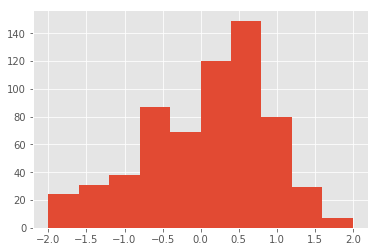

In [22]:
# Looking at Central Tendancy 
stand_df['P_IPO'].hist(range=(-2,2))
# Central Tendancy of Data is Normal
# if the range is [-2,2] and does not take into accounts 
# outliers. 

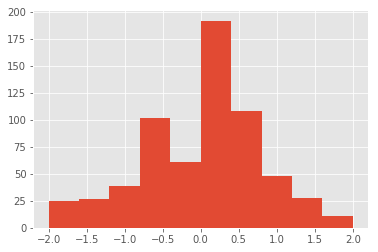

In [23]:
stand_df['P_H'].hist(range=(-2,2))
# Central Tendancy of Data is Normal 

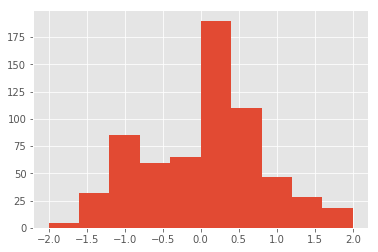

In [24]:
stand_df['P_L'].hist(range=(-2,2))

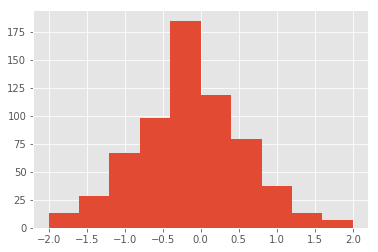

In [25]:
stand_df['P_1DAY'].hist(range=(-2,2))

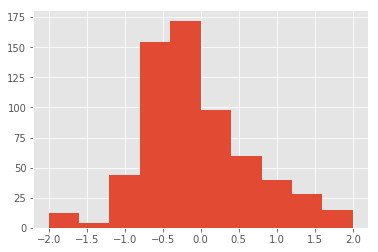

In [26]:
stand_df['C1'].hist(range=(-2,2))

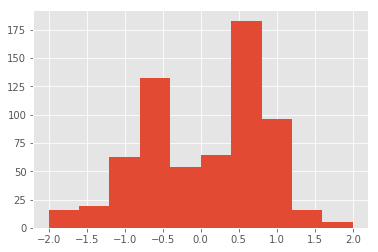

In [28]:
stand_df['C3'].hist(range=(-2,2))

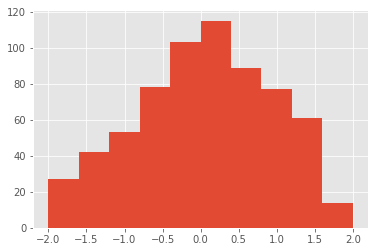

In [29]:
stand_df['C4'].hist(range=(-2,2))

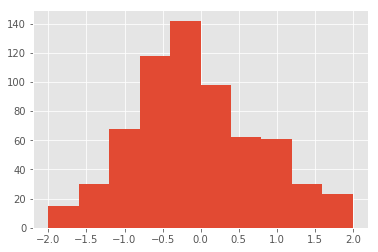

In [30]:
stand_df['C5'].hist(range=(-2,2))

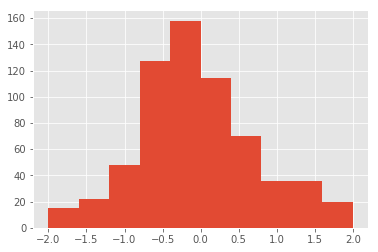

In [31]:
stand_df['C6'].hist(range=(-2,2))

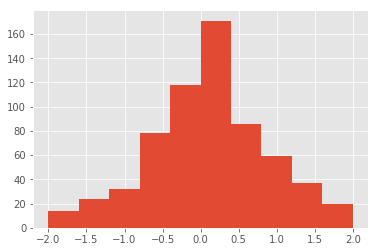

In [32]:
stand_df['C7'].hist(range=(-2,2))

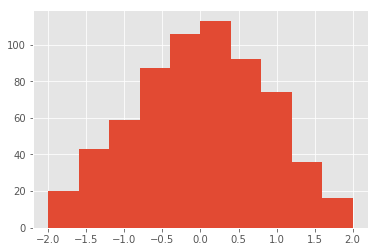

In [33]:
stand_df['T1'].hist(range=(-2,2))

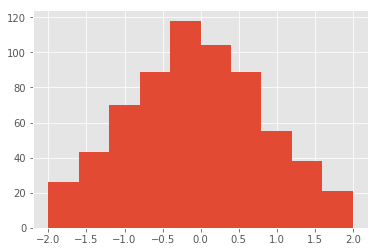

In [34]:
stand_df['T2'].hist(range=(-2,2))

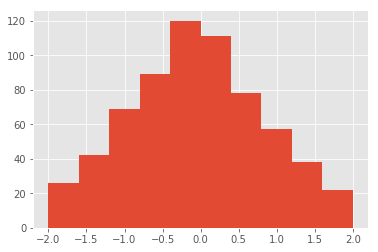

In [35]:
stand_df['T3'].hist(range=(-2,2))

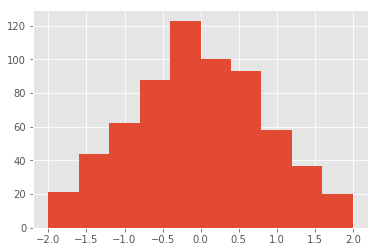

In [36]:
stand_df['T4'].hist(range=(-2,2))

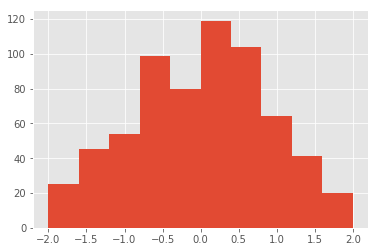

In [37]:
stand_df['T5'].hist(range=(-2,2))

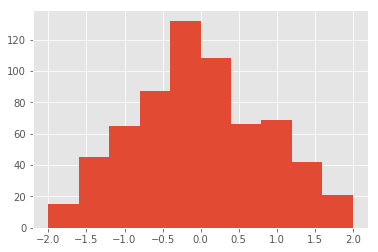

In [38]:
stand_df['S1'].hist(range=(-2,2))

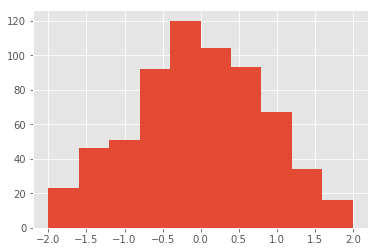

In [39]:
stand_df['S2'].hist(range=(-2,2))

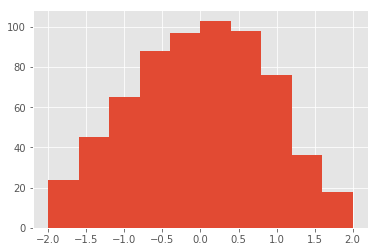

In [40]:
stand_df['S3'].hist(range=(-2,2))

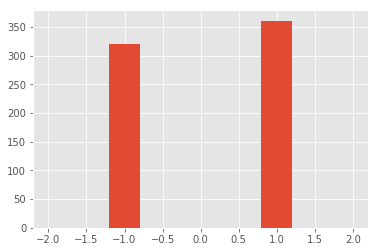

In [41]:
stand_df["C3'"].hist(range=(-2,2))

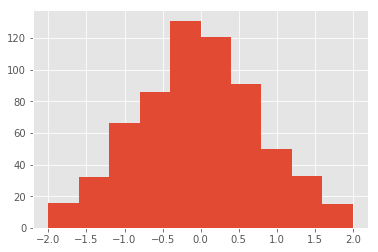

In [42]:
stand_df["C5'"].hist(range=(-2,2))